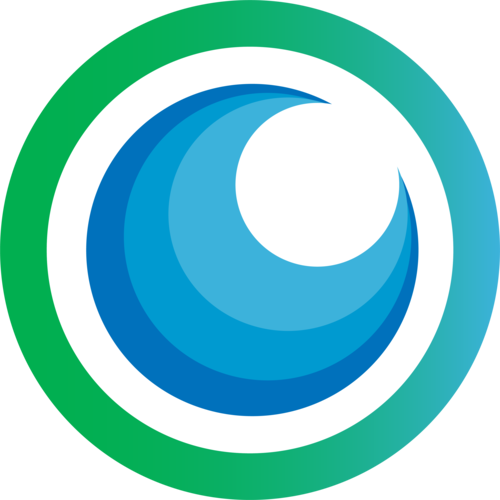
# Epoch Tutorials: Tensorflow and Keras

### Introduction
This notebook is part of the Epoch III onboarding for the engineers departement, and can be used as reference for future competitions on the topic of Tensorflow and Keras. 

### Data
The dataset used in this notebook is the sign language mnist dataset, which is publicly available on Kaggle. It consists of a predetermined train/test split, with 27455 train images and 7172 test images, labeled with one of the 24 letters of the sign alphabet (the 'j' and 'z' require motion). The dataset is usually published as a csv file with each column depicting a pixel, but was reformatted for the purpose of this notebook to a numpy npz file.


### Contents
- [Preprocessing](#Preprocessing)
- [Explorative Data Analysis (EDA)](#Explorative-Data-Analysis-(EDA))
- [Keras ANN](#Keras-ANN)
- [Keras CNN](#Keras-CNN)
- [Custom Model calls and Train Loops](#Custom-Model-calls-and-Train-Loops)
- [Advanced Model Structures](#Advanced-Model-Structures)

In [60]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm

tf.random.set_seed(0)
np.random.seed(0)

### Preprocessing

In [61]:
# First, we want to load the data from the npz file. Note that the images are grayscale, but transformed to RGB here
data = np.load("../data/sign_data.npz")
X_train, X_test, y_train, y_test = data["X_train"], data["X_test"], data["y_train"], data["y_test"]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(27455, 28, 28, 3) (27455,) (7172, 28, 28, 3) (7172,)


### Explorative Data Analysis (EDA)

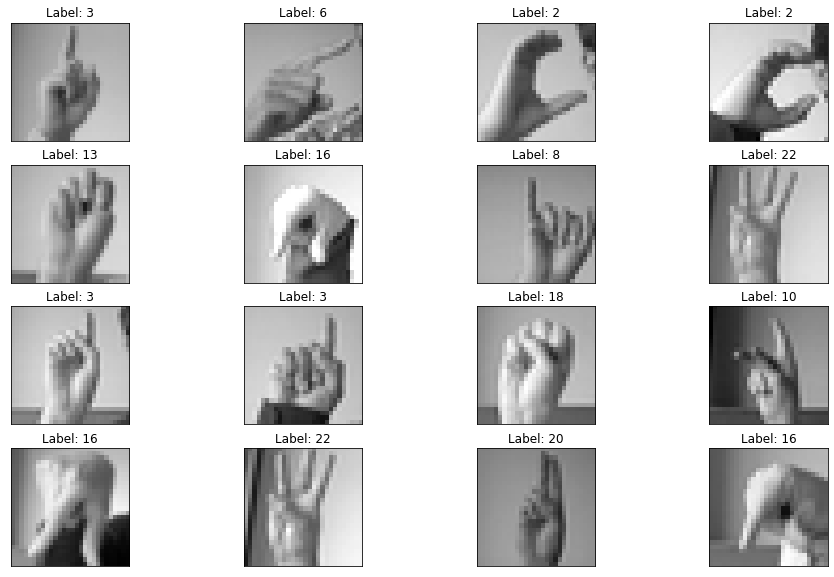

In [62]:
# Let's look at some of the images
fig, axs = plt.subplots(4, 4, figsize=(16, 10))
for i in range(16):
    axs[i//4, i%4].imshow(X_train[i])
    axs[i//4, i%4].set_title(f"Label: {y_train[i]}")
    axs[i//4, i%4].get_xaxis().set_visible(False)
    axs[i//4, i%4].get_yaxis().set_visible(False)

plt.show()

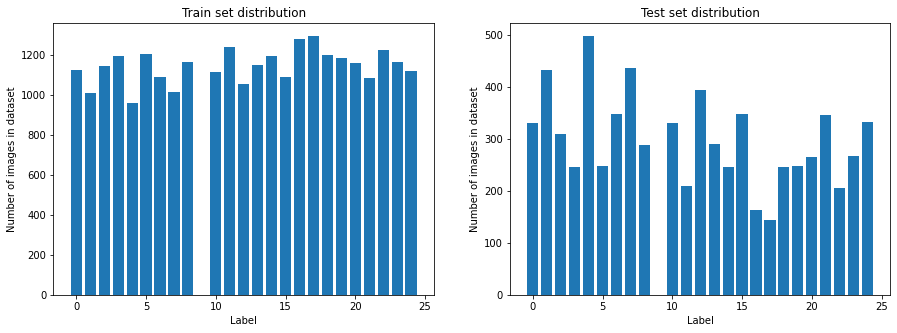

In [63]:
# Let's look at the distributions of the images
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].bar(range(25), [(y_train == i).sum() for i in range(25)])
axs[0].set_title("Train set distribution")

axs[1].bar(range(25), [(y_test == i).sum() for i in range(25)])
axs[1].set_title("Test set distribution")

for ax in axs.flat:
    ax.set(xlabel='Label', ylabel='Number of images in dataset')
    
plt.show()

### Keras ANN

In [64]:
# A Keras network consists of several layers, an optimizer, and a loss function
from tensorflow.keras import models, layers

# Define input dimension which is dependent on your data
input_dimension = X_train.shape[1] * X_train.shape[2]

model = models.Sequential()
model.add(layers.Dense(4096, input_dim=input_dimension, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(25, activation='softmax'))

# Define optimizer and loss function
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy()

# Compile the model to be able to call .fit and .evaluate methods
# Fitting can also be done (more) manually, an example will follow
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 4096)              3215360   
                                                                 
 dense_51 (Dense)            (None, 512)               2097664   
                                                                 
 dense_52 (Dense)            (None, 25)                12825     
                                                                 
Total params: 5,325,849
Trainable params: 5,325,849
Non-trainable params: 0
_________________________________________________________________


In [65]:
# You can build custom loss funtions and/or optimizers
def custom_loss_function(y_true, y_pred):
    # The loss function in the models receives Tensors, not arrays, so work with the keras backend functions
    return tf.keras.backend.abs(y_true - y_pred)

# You can feed the custom loss function to the model
model.compile(optimizer=optimizer, loss=custom_loss_function, metrics=['accuracy'])
print(f"Model loss function: {model.loss}")

# Or use the one defined before (which should work better on our problem)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
print(f"Model loss function: {model.loss}")

Model loss function: <function custom_loss_function at 0x00000254308998B0>
Model loss function: <keras.losses.CategoricalCrossentropy object at 0x00000254308A6C40>


In [66]:
# Let's flatten our input to 784 dimensions (28x28x1)
X_train_flattened = X_train[:, :, :, 0].reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test_flattened = X_test[:, :, :, 0].reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

# Change the labels to arrays of length 25, with a 1 at index label and zeros filling in the rest
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Train and evaluate the model created
history_ann = model.fit(X_train_flattened, y_train, epochs=10, batch_size=128)
model.evaluate(X_test_flattened, y_test)

Epoch 1/10
215/215 [==============================] - 14s 61ms/step - loss: 141.2980 - accuracy: 0.1396
Epoch 2/10
215/215 [==============================] - 11s 52ms/step - loss: 2.1526 - accuracy: 0.3609
Epoch 3/10
215/215 [==============================] - 12s 57ms/step - loss: 1.5763 - accuracy: 0.5128
Epoch 4/10
215/215 [==============================] - 12s 54ms/step - loss: 1.1368 - accuracy: 0.6435
Epoch 5/10
215/215 [==============================] - 12s 56ms/step - loss: 0.8849 - accuracy: 0.7210
Epoch 6/10
215/215 [==============================] - 12s 54ms/step - loss: 0.7124 - accuracy: 0.7727
Epoch 7/10
215/215 [==============================] - 12s 56ms/step - loss: 0.5208 - accuracy: 0.8340
Epoch 8/10
215/215 [==============================] - 12s 56ms/step - loss: 0.4079 - accuracy: 0.8689
Epoch 9/10
215/215 [==============================] - 13s 61ms/step - loss: 0.3465 - accuracy: 0.8881
Epoch 10/10
225/225 [==============================] - 2s 9ms/step - loss: 1.488

[1.4885118007659912, 0.6604852080345154]

### Keras CNN

In [67]:
# You can also define a keras model with a list of layers as below
# We will now use a convolutional network
conv_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28, 28, 3)),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(25, activation="softmax"),])

conv_model.compile(optimizer="adam", loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [68]:
# Train and evaluate the CNN model
cnn_history = conv_model.fit(X_train, y_train, epochs=10, batch_size=128)
conv_model.evaluate(X_test, y_test)

Epoch 1/10
215/215 [==============================] - 12s 47ms/step - loss: 3.7345 - accuracy: 0.2233
Epoch 2/10
215/215 [==============================] - 9s 43ms/step - loss: 0.9882 - accuracy: 0.6925
Epoch 3/10
215/215 [==============================] - 9s 43ms/step - loss: 0.3778 - accuracy: 0.8818
Epoch 4/10
215/215 [==============================] - 9s 43ms/step - loss: 0.1347 - accuracy: 0.9615
Epoch 5/10
215/215 [==============================] - 9s 44ms/step - loss: 0.0370 - accuracy: 0.9933
Epoch 6/10
215/215 [==============================] - 11s 49ms/step - loss: 0.0176 - accuracy: 0.9970
Epoch 7/10
215/215 [==============================] - 11s 53ms/step - loss: 0.0077 - accuracy: 0.9992
Epoch 8/10
215/215 [==============================] - 11s 51ms/step - loss: 0.0052 - accuracy: 0.9997
Epoch 9/10
215/215 [==============================] - 9s 43ms/step - loss: 0.0025 - accuracy: 0.9999
Epoch 10/10
225/225 [==============================] - 1s 4ms/step - loss: 1.4646 - acc

[1.4645984172821045, 0.796988308429718]

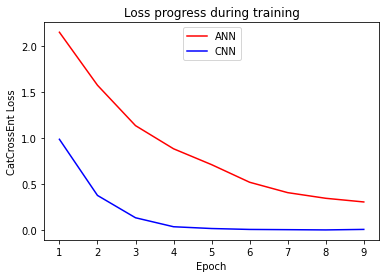

In [69]:
# Let's take a look at the training progress made by the models based on the loss
plt.plot(range(1, history_ann.params['epochs']), history_ann.history['loss'][1:], color="red", label="ANN")
plt.plot(range(1, cnn_history.params['epochs']), cnn_history.history['loss'][1:], color="blue", label="CNN")
plt.legend(loc='upper center')
plt.title("Loss progress during training")
plt.xlabel("Epoch")
plt.ylabel("CatCrossEnt Loss")
plt.show()

### Custom Model calls and Train Loops

In [70]:
# In this section, we will dive deeper into TensorFlow and Keras, with a custom model and train loop

class TutorialModel(tf.keras.Model):
    """
    A model to demonstrate the custom inner workings of Keras
    """
    def __init__(self, input_shape):
        super().__init__()
        
        self.sequential_layers = [
            tf.keras.layers.Conv2D(32, input_shape=input_shape, kernel_size=(3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(25, activation="softmax")]
        
        
    def call(self, inputs):
        # In contrast to a compiled model, determine how a forward pass works
        values = inputs
        current_layer_index = 0
        
        # Loop over the layers in the model (many ways you can do this)
        while current_layer_index < len(self.sequential_layers):

            # Pass the current values through the current layer to get layer output
            values = self.sequential_layers[current_layer_index](values)
            current_layer_index += 1
            
        # Finally, values should be the output of the Dense softmax layer
        return values    

In [71]:
# Define train function
def train_model(model, loss, optimizer, batch_size=32, epochs=10):
    # Iterate over batches
    losses = []
    for e in range(epochs):
        for batch_start in tqdm(range(0, X_train.shape[0], batch_size), desc=f"Training epoch {e}"):
            
            with tf.GradientTape() as tape:
                # Select train batch
                X_batch = X_train[batch_start: batch_start + batch_size].astype(np.float32)
                y_batch = y_train[batch_start: batch_start + batch_size].astype(np.float32)

                # Make forward pass through the model
                model_output = custom_model(X_batch)

                # Calculate losses from output and true labels
                model_loss = loss(y_batch, model_output)
                losses.append(model_loss)

            # Calculate the gradients of this batch (backpropagation - calculate d values)
            gradients = tape.gradient(model_loss, custom_model.trainable_variables)

            # Update the model weights using the calculated gradients (backpropagation - update weights)
            optimizer.apply_gradients(zip(gradients, custom_model.trainable_variables))
        losses = losses[:e] + [np.mean(losses[e:])]
    return model, losses

# Now, lets train the model manually
custom_model = TutorialModel((28, 28, 3))
batch_size = 32

loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()    

# Note there is no output, since the model is custom trained  
trained_custom_model, losses_custom_model = train_model(custom_model, loss, optimizer, batch_size=128, epochs=10)


Training epoch 9: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 215/215 [00:15<00:00, 14.20it/s]


In [72]:
# Let's test the model we customly trained
def test_model(model, loss):
    
    outputs = model(X_test.astype(np.float32))
    accuracy = (np.argmax(outputs, axis=1) == np.argmax(y_test, axis=1))
    
    return np.mean(loss(y_test, outputs)), np.sum(accuracy) / len(accuracy)

loss, acc = test_model(custom_model, loss)
print(loss, acc)

1.3146791 0.7551589514779699


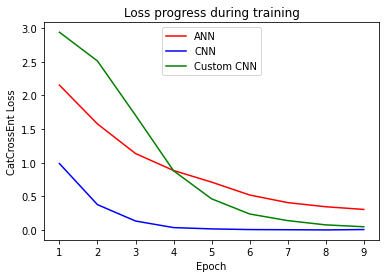

In [73]:
# Let's take a look at the training progress made by all models so far
# Plotting from epoch 1-9 since ANN has a huge loss (100+) for epoch 0, which does not look nice in a plot
plt.plot(range(1, history_ann.params['epochs']), history_ann.history['loss'][1:], color="red", label="ANN")
plt.plot(range(1, cnn_history.params['epochs']), cnn_history.history['loss'][1:], color="blue", label="CNN")
plt.plot(range(1, len(losses_custom_model)), losses_custom_model[1:], color="green", label="Custom CNN")

plt.legend(loc='upper center')
plt.title("Loss progress during training")
plt.xlabel("Epoch")
plt.ylabel("CatCrossEnt Loss")
plt.show()

### Advanced Model Structures

In [74]:
# So far, we used relatively straightforward CNN and Dense layers. Any Keras layer can be used
# This network is not build for performance, but to show some of the possibilities in Keras models
example = models.Sequential()

# Convolutional Recurrent Layer
example.add(layers.ConvLSTM1D(16, kernel_size=3))

# We can use recurrent structures capable of dealing with time data, such as LSTM
example.add(layers.LSTM(16))

# Dense layer with custom activation
example.add(layers.Dense(25, activation=lambda l: np.random.random() * l))

# We can use batchnormalization
example.add(layers.BatchNormalization())

# Dropout can boost performance by disabling neurons in training
example.add(layers.Dropout(0.2))

# Add output layer
example.add(layers.Dense(25, activation='sigmoid'))

example.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
example.build(input_shape=(None, 28, 28, 3))

example.summary()

# We can still fit our model although it is very unfit for the task
example.fit(X_train[:5000], y_train[:5000], batch_size=128, epochs=1)
example.evaluate(X_test, y_test)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm1d_8 (ConvLSTM1D)  (None, 26, 64)            51712     
                                                                 
 lstm_24 (LSTM)              (None, 64)                33024     
                                                                 
 dense_57 (Dense)            (None, 25)                1625      
                                                                 
 batch_normalization_9 (Batc  (None, 25)               100       
 hNormalization)                                                 
                                                                 
 dropout_21 (Dropout)        (None, 25)                0         
                                                                 
 dense_58 (Dense)            (None, 25)                650       
                                                     

[0.17578281462192535, 0.035136643797159195]